In [1]:
import os
import sys

from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import pandas as pd
import warnings
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
strategy_name = "BO_SLOPE"
file_path = f"data/meta_labels/{strategy_name}_meta_labels.csv"
df = pd.read_csv(file_path)
# df["date"] = pd.to_datetime(df["date"])
# df = df.set_index("date")
df["strat_trades"] = df["strat_trades"].astype(int)
df = df[df["strat_trades"]!=0]
X,y = df[["on_volume", "gaps", "volume", "ocr", "oc2r", "on_volume_ratio", "hl_range_norm", "volume_ratio", "gen_daily_rv_ratio","ibs",
                    "vvix_z_score", "vix_ratio1", "vix_ratio2", "spy_on_volume", "spy_on_vol_ratio"]], df[["labels"]]
X_display,y_display = X, y

In [3]:
df.head()

,date,strat_ret,close,strat_trades,labels,on_volume,gaps,volume,ocr,oc2r,hl_range_norm,on_volume_ratio,volume_ratio,gen_daily_rv_ratio,ibs,vvix_z_score,vix_ratio1,vix_ratio2,spy_on_volume,spy_on_vol_ratio
224,2015-11-19,-0.007444,321.76,2,0,0.378532,-0.701961,0.611571,-1.290175,0.780041,0.111825,-0.789829,-5.199338,-5.199338,-0.799602,0.629964,5.199338,-0.458320,1.250435,-5.199338
235,2015-12-07,0.022834,295.36,2,1,-0.230146,-0.776341,1.226357,-0.563506,0.780803,0.763144,-1.024483,-1.186129,-0.408690,-1.159319,-0.674970,0.301654,0.780586,1.464322,-5.199338
250,2015-12-29,-0.002000,304.32,2,0,-0.533967,-0.149039,-1.294195,-0.306141,-1.237580,-0.473224,1.243985,5.199338,1.081731,-0.772931,-1.244127,0.772517,0.418620,-1.398520,5.199338
251,2015-12-30,-0.002992,313.76,2,0,-1.515665,0.823294,-1.282893,-1.412354,-0.399366,-2.955167,5.199338,5.199338,5.199338,-0.425876,-5.199338,0.955433,0.838413,-0.275094,2.099908
262,2016-01-15,0.022193,427.20,2,1,0.838910,1.275803,1.052107,-0.641692,0.770038,0.887376,-0.805281,-1.238163,-1.057821,-0.136626,0.426680,-0.823571,-0.515242,1.024044,-0.080018


#### read dataset


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [5]:
model = xgboost.XGBClassifier().fit(X_train, y_train)

[12:18:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Creating SHAP values

In [6]:
explainer = shap.TreeExplainer(model)
features = X_train
features.index = list(range(features.shape[0]))
shap_values = explainer.shap_values(features)

In [7]:
# expected_value = explainer.expected_value
# feature_display = X_display.loc[features.index]
# shap_interaction_values = explainer.shap_interaction_values(features)

In [8]:
# vals= np.abs(shap_values).mean(0)
# feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
# feature_importance = feature_importance.sort_values(by=['feature_importance_vals'],ascending=False)
# feature_importance.head(11)

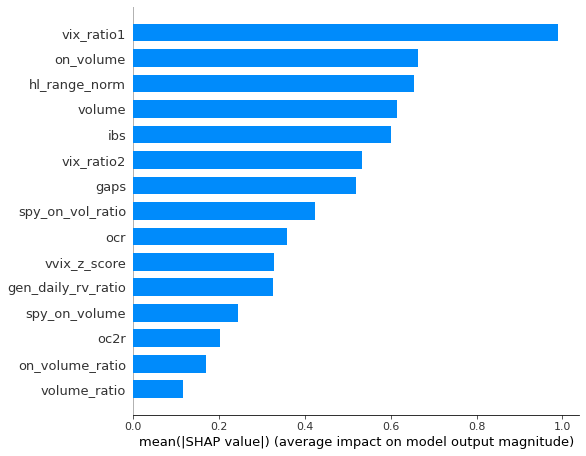

In [9]:
"Shap Feature Importance Plots"
shap.summary_plot(shap_values, features, plot_type="bar")

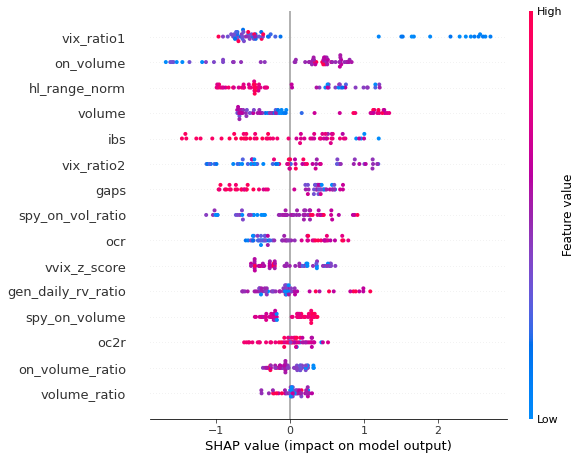

In [10]:
"Shap Summary Plot"
shap.summary_plot(shap_values, features)